### SVM Classifiers for classification of open/close questions

In [40]:
import pandas as pd
import numpy as np
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [2]:
openCloseData = pd.read_csv('openCloseData.csv')

In [3]:
openCloseData.columns

Index(['Unnamed: 0', 'PostId', 'UserId', 'Comment', 'Body', 'Title', 'Tags',
       'Reputation', 'experienceInTime', 'WebsiteUrl', 'Location', 'AboutMe',
       'Views', 'Upvotes', 'Downvotes', 'ProfileImageUrl', 'tagCount',
       'closed', 'lowerUpperRatio', 'sentenceCount', 'firstLineLength',
       'codeLength', 'urlCount', 'SOUrlCount', 'titleLengthInChars',
       'countOfInterrogativeSent', 'sentencesStartWithYouCount',
       'sentencesStartWithICount', 'shortWordCount', 'bodyWordCount',
       'punctuationCount', 'websiteUrlFilled', 'locationFilled',
       'aboutMeFilled', 'profileImageUrlFilled'],
      dtype='object')

In [4]:
print(openCloseData.shape)
openCloseData.drop(['Unnamed: 0'],inplace=True,axis=1)
print(openCloseData.shape)

(159996, 35)
(159996, 34)


In [5]:
# openCloseData.dtypes
# openCloseData.loc[openCloseData['Reputation'] == 'https://i.stack.imgur.com/TLzJW.png?s=128&g=1']
openCloseData.loc[openCloseData['UserId'] == 443]

,PostId,UserId,Comment,Body,Title,Tags,Reputation,experienceInTime,WebsiteUrl,Location,...,countOfInterrogativeSent,sentencesStartWithYouCount,sentencesStartWithICount,shortWordCount,bodyWordCount,punctuationCount,websiteUrlFilled,locationFilled,aboutMeFilled,profileImageUrlFilled


In [6]:
openCloseData.loc[openCloseData['UserId'] == 11] 

,PostId,UserId,Comment,Body,Title,Tags,Reputation,experienceInTime,WebsiteUrl,Location,...,countOfInterrogativeSent,sentencesStartWithYouCount,sentencesStartWithICount,shortWordCount,bodyWordCount,punctuationCount,websiteUrlFilled,locationFilled,aboutMeFilled,profileImageUrlFilled


In [7]:
print(openCloseData.shape)

(159996, 34)


In [8]:
X = openCloseData.loc[:,['Reputation',
       'experienceInTime', 'Views',
       'Upvotes', 'Downvotes', 'tagCount', 'closed',
       'lowerUpperRatio', 'sentenceCount', 'firstLineLength', 'codeLength',
       'urlCount', 'SOUrlCount', 'titleLengthInChars',
       'countOfInterrogativeSent', 'sentencesStartWithYouCount',
       'sentencesStartWithICount', 'shortWordCount', 'bodyWordCount',
       'punctuationCount', 'websiteUrlFilled', 'locationFilled',
       'aboutMeFilled', 'profileImageUrlFilled'] ]
# X['Reputation'] = pd.to_numeric(X['Reputation'])
X.replace(np.nan,0,inplace=True)  #replacing NaN to 0
X.lowerUpperRatio.replace(np.inf,0,inplace=True)  #replacing infinity to 0
print(X.shape)
print(type(X))

(159996, 24)
<class 'pandas.core.frame.DataFrame'>


In [9]:
X.dtypes

Reputation                      int64
experienceInTime                int64
Views                           int64
Upvotes                         int64
Downvotes                       int64
tagCount                        int64
closed                          int64
lowerUpperRatio               float64
sentenceCount                   int64
firstLineLength                 int64
codeLength                      int64
urlCount                        int64
SOUrlCount                      int64
titleLengthInChars              int64
countOfInterrogativeSent        int64
sentencesStartWithYouCount      int64
sentencesStartWithICount        int64
shortWordCount                  int64
bodyWordCount                   int64
punctuationCount                int64
websiteUrlFilled                int64
locationFilled                  int64
aboutMeFilled                   int64
profileImageUrlFilled           int64
dtype: object

In [10]:
y = X.closed
X.drop(['closed'],inplace=True,axis=1)
print(y.shape)
print(X.shape)

(159996,)
(159996, 23)


In [12]:
#x=(x-u)/std

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#print(scaler.fit(X))
#print(scaler.mean_)
X=scaler.fit_transform(X)
print(type(X))
X = pd.DataFrame(X, columns=['Reputation', 'experienceInTime', 'Views', 'Upvotes', 'Downvotes',
       'tagCount', 'lowerUpperRatio', 'sentenceCount', 'firstLineLength',
       'codeLength', 'urlCount', 'SOUrlCount', 'titleLengthInChars',
       'countOfInterrogativeSent', 'sentencesStartWithYouCount',
       'sentencesStartWithICount', 'shortWordCount', 'bodyWordCount',
       'punctuationCount', 'websiteUrlFilled', 'locationFilled',
       'aboutMeFilled', 'profileImageUrlFilled'])

<class 'numpy.ndarray'>


In [13]:
#Train/Test Split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [14]:
print(X_train.head())

        Reputation  experienceInTime     Views   Upvotes  Downvotes  tagCount  \
29416    -0.115114          0.452619 -0.010520  0.398696  -0.053556 -0.738430   
58063    -0.183569          0.678131 -0.169540 -0.230655  -0.065531 -1.553673   
62206    -0.116962          0.013553 -0.106049 -0.059482   0.003322  0.892056   
14790    -0.178488         -0.871412 -0.170123 -0.291145  -0.065531 -1.553673   
152752   -0.172206         -0.000114 -0.132261 -0.273127  -0.062537  1.707299   

        lowerUpperRatio  sentenceCount  firstLineLength  codeLength  \
29416          0.667997      -0.344881         3.634055   -0.049610   
58063         -0.204290      -0.344881        -0.415458   -0.394312   
62206          1.891518      -0.133287        -0.255151   -0.394312   
14790         -0.271389      -0.250840         0.142134   -0.394312   
152752        -0.121783      -0.274350         0.302441   -0.345069   

                ...            countOfInterrogativeSent  \
29416           ...        

In [15]:
print(X_train.shape)

(111997, 23)


#### Using LinearSVC

In [38]:
c = list(np.arange(1, 26, 0.5))
accuracy = []
y_predicted = np.zeros((y_test.shape))
max_accuracy = 0.0
linear_svm_classifier = LinearSVC()

for i in c:
    classifier = LinearSVC(C = i)
    classifier.fit(X_train, y_train)
    predicted_y = classifier.predict(X_test)
    accuracy.append(np.mean(y_test==predicted_y))
    print('Accuracy for C = {} is : {:.4f}'.format(i, accuracy[-1]))
    if(accuracy[-1] > max_accuracy):
        y_predicted = predicted_y
        max_accuracy = accuracy[-1]
        linear_svm_classifier = classifier

Accuracy for C = 1.0 is : 0.8189
Accuracy for C = 1.5 is : 0.8209
Accuracy for C = 2.0 is : 0.8232
Accuracy for C = 2.5 is : 0.7600
Accuracy for C = 3.0 is : 0.8250
Accuracy for C = 3.5 is : 0.8262
Accuracy for C = 4.0 is : 0.8259
Accuracy for C = 4.5 is : 0.8280
Accuracy for C = 5.0 is : 0.8270
Accuracy for C = 5.5 is : 0.8282
Accuracy for C = 6.0 is : 0.8293
Accuracy for C = 6.5 is : 0.8277
Accuracy for C = 7.0 is : 0.8230
Accuracy for C = 7.5 is : 0.8284
Accuracy for C = 8.0 is : 0.8299
Accuracy for C = 8.5 is : 0.8291
Accuracy for C = 9.0 is : 0.8278
Accuracy for C = 9.5 is : 0.8285
Accuracy for C = 10.0 is : 0.8319
Accuracy for C = 10.5 is : 0.8321
Accuracy for C = 11.0 is : 0.8291
Accuracy for C = 11.5 is : 0.8230
Accuracy for C = 12.0 is : 0.8303
Accuracy for C = 12.5 is : 0.8283
Accuracy for C = 13.0 is : 0.8288
Accuracy for C = 13.5 is : 0.8314
Accuracy for C = 14.0 is : 0.8244
Accuracy for C = 14.5 is : 0.8308
Accuracy for C = 15.0 is : 0.8305
Accuracy for C = 15.5 is : 0.833

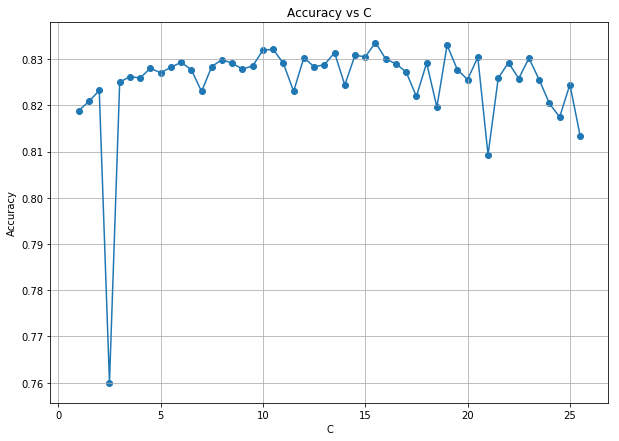

In [48]:
plt.figure(figsize=(10,7))
plt.plot(c, accuracy)
plt.scatter(c, accuracy)
plt.title('Accuracy vs C')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

In [49]:
print(classification_report(y_test,y_predicted))

             precision    recall  f1-score   support

          0       0.88      0.78      0.82     24085
          1       0.80      0.89      0.84     23914

avg / total       0.84      0.83      0.83     47999



In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold,cross_val_score
k_fold = KFold(n_splits=5)
    
cross_val_score(linear_svm_classifier,X,y,cv=k_fold,scoring='accuracy',n_jobs=-1)

array([ 0.8144375 ,  0.68820901,  0.79155599,  0.66714585,  0.64411388])

#### Using RBF kernel

In [ ]:
# TODO

#### Using poly kernel

In [ ]:
# TODO

#### Using sigmoid kernel

In [ ]:
# TODO